In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="ticks", color_codes=True)

In [4]:
    '''
    results_matrix = df_results.as_matrix()
    import sklearn
    from sklearn import metrics
    print(len(results_matrix[:, 0]))
    print(len(results_matrix[:, 1]))
    print(sklearn.metrics.r2_score(results_matrix[:, 0], results_matrix[:, 1]))
    from scipy import stats
    print(stats.pearsonr(results_matrix[:, 0], results_matrix[:, 1]))
    slope, intercept, r_value, p_value, std_err = stats.linregress(results_matrix[:, 0], results_matrix[:, 1])
    print(r_value)
    '''
    '''
    results_matrix = df_results.as_matrix()
    import sklearn
    from sklearn import metrics
    print(sklearn.metrics.r2_score(results_matrix[:, 0], results_matrix[:, 1]))
    from scipy import stats
    '''

'\nresults_matrix = df_results.as_matrix()\nimport sklearn\nfrom sklearn import metrics\nprint(sklearn.metrics.r2_score(results_matrix[:, 0], results_matrix[:, 1]))\nfrom scipy import stats\n'

In [5]:
def plot_results_2(path_to_directory):
    final_true_results = None
    final_true_results_isNone = True
    final_predicted_results = None
    final_predicted_results_isNone = True
    pmRanges = ['00-09', '10-19', '20-29', '30-39', '40-49', '50-59']
    filenames = os.listdir(path_to_directory)
    for current_pmRange_ in pmRanges:
        current_filenames = [f for f in filenames if re.match('.*' + current_pmRange_ + '.*', f)]
        if final_predicted_results_isNone:
            final_predicted_results = np.load(path_to_directory + "/" + current_filenames[0]).reshape(-1, 1)
            final_predicted_results_isNone = False
        else:
            final_predicted_results = np.concatenate((final_predicted_results, np.load(path_to_directory + "/" + current_filenames[0]).reshape(-1, 1)), axis=0)
        if final_true_results_isNone:
            final_true_results = np.load(path_to_directory + "/" + current_filenames[1]).reshape(-1, 1)
            final_true_results_isNone = False
        else:
            final_true_results = np.concatenate((final_true_results, np.load(path_to_directory + "/" + current_filenames[1]).reshape(-1, 1)), axis=0)
    
    results = np.concatenate((final_true_results.reshape(-1, 1), final_predicted_results.reshape(-1, 1)), axis=1)
    df_results = pd.DataFrame(results, columns=['True', 'Predicted'])  
    df_results['True'] = df_results['True'].astype(np.float64)
    df_results['Predicted'] = df_results['Predicted'].astype(np.float64)
    return df_results

In [6]:
def plot_results(path_to_predicted_output, path_to_true_output):
    predicted_results = np.load(path_to_predicted_output)
    predicted_results = predicted_results[:len(predicted_results)]
    print(len(predicted_results))
    true_results = np.load(path_to_true_output)
    true_results = true_results[:len(true_results)] 
    print(len(true_results))
    results = np.concatenate((true_results.reshape(-1, 1), predicted_results.reshape(-1, 1)), axis=1)
    df_results = pd.DataFrame(results, columns=['True', 'Predicted'])  
    df_results['True'] = df_results['True'].astype(np.float64)
    df_results['Predicted'] = df_results['Predicted'].astype(np.float64)
    return df_results

In [8]:
df_results_for_vgg_dev_1066_with_time_split = plot_results("results_for_final_paper/VGG_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_1100_steps/DEV/VGG_DEV_1066_output_predicted_values_time_split_1100_steps.npy", "results_for_final_paper/VGG_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_1100_steps/DEV/VGG_DEV_1066_output_true_values_time_split_1100_steps.npy")




5280
5280


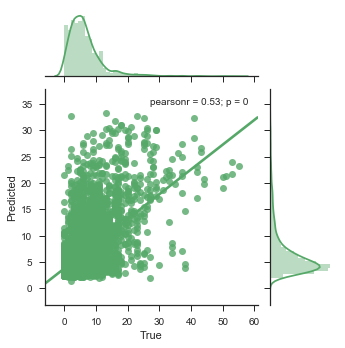

In [9]:
vgg_dev_1066_plot_with_time_split_1100_steps = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_1066_with_time_split, kind="reg", ci = None, size=5, ratio=3, color="g")

In [10]:
df_results_for_vgg_dev_1066_time_split_3100_steps = plot_results("results_for_final_paper/VGG_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/VGG_DEV_1066_output_predicted_values_time_split_3100_steps.npy", "results_for_final_paper/VGG_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/VGG_DEV_1066_output_true_values_time_split_3100_steps.npy")



5280
5280


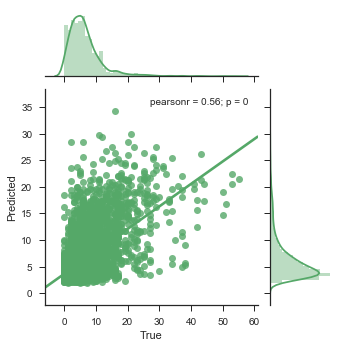

In [11]:
vgg_dev_1066_plot_with_time_split_3100_steps = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_1066_time_split_3100_steps, kind="reg", ci = None, size=5, ratio=3, color="g")



In [12]:
df_results_for_dehazenet_dev_1066_timesplit_3100_steps = plot_results("results_for_final_paper/DEHAZENET_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/DEHAZENET_DEV_1066_output_predicted_values_timesplit_3100_steps.npy", "results_for_final_paper/DEHAZENET_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/DehazeNet_DEV_1066_output_true_values_timesplit_3100_steps.npy")


5280
5280


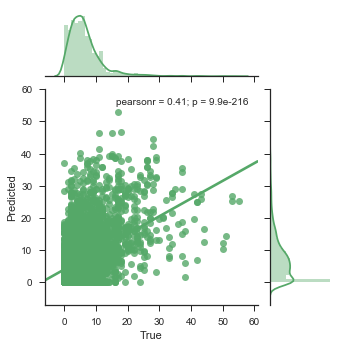

In [13]:
dehazenet_dev_1066_plot_with_timesplit_3100_steps = sns.jointplot("True", "Predicted", data=df_results_for_dehazenet_dev_1066_timesplit_3100_steps, kind="reg", ci = None, size=5, ratio=3, color="g")

In [14]:
df_results_for_resnet_dev_1066_timesplit_3100_steps = plot_results("results_for_final_paper/RESNET_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/ResNet_DEV_1066_output_predicted_values_timesplit_3100_steps.npy", "results_for_final_paper/RESNET_webcamId_1066_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/ResNet_DEV_1066_output_true_values_timesplit_3100_steps.npy")



5280
5280


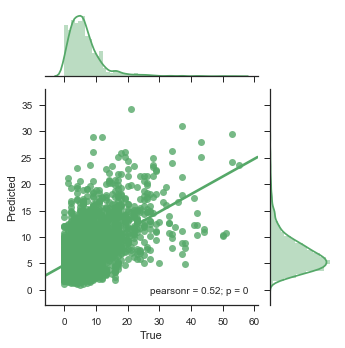

In [15]:
resnet_dev_1066_plot_with_timesplit_3100_steps = sns.jointplot("True", "Predicted", data=df_results_for_resnet_dev_1066_timesplit_3100_steps, kind="reg", ci = None, size=5, ratio=3, color="g")



In [18]:
df_results_for_vgg_dev_17603_time_split_3100_steps = plot_results("results_for_final_paper/VGG_webcamId_17603_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/VGG_DEV_17603_output_predicted_values_timesplit_3100_steps.npy", "results_for_final_paper/VGG_webcamId_17603_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/VGG_DEV_17603_output_true_values_timesplit_3100_steps.npy")




3136
3136


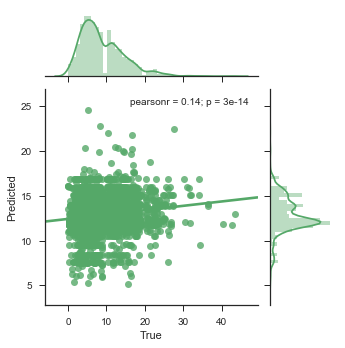

In [19]:
vgg_dev_17603_plot_with_time_split_3100_steps = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_17603_time_split_3100_steps, kind="reg", ci = None, size=5, ratio=3, color="g")




In [25]:
df_results_for_dehazenet_dev_17603_timesplit_3100_steps = plot_results("results_for_final_paper/DEHAZENET_webcamId_17603_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/DehazeNet_DEV_17603_output_predicted_values_timesplit_3100_steps.npy", "results_for_final_paper/DEHAZENET_webcamId_17603_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/DehazeNet_DEV_17603_output_true_values_timesplit_3100_steps.npy")



3136
3136


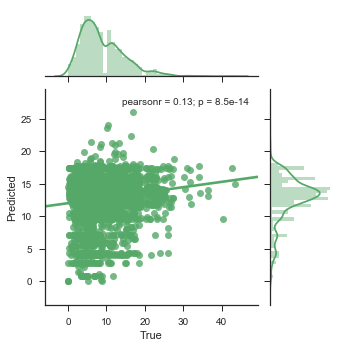

In [26]:
dehazenet_dev_17603_plot_with_timesplit_3100_steps = sns.jointplot("True", "Predicted", data=df_results_for_dehazenet_dev_17603_timesplit_3100_steps, kind="reg", ci = None, size=5, ratio=3, color="g")




In [21]:
df_results_for_resnet_dev_17603_timesplit_3100_steps = plot_results("results_for_final_paper/RESNET_webcamId_17603_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/ResNet_DEV_17603_output_predicted_values_timesplit_3100_steps.npy", "results_for_final_paper/RESNET_webcamId_17603_timeSplit_trainedOnRepresentativeDistributionPerBatch_3100_steps/DEV/ResNet_DEV_17603_output_true_values_timesplit_3100_steps.npy")





3136
3136


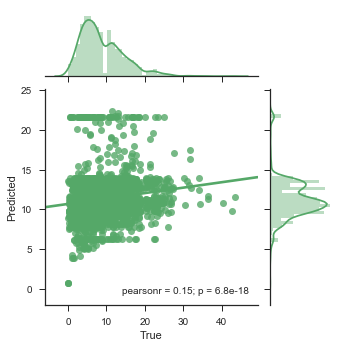

In [22]:
resnet_dev_17603_plot_with_timesplit_3100_steps = sns.jointplot("True", "Predicted", data=df_results_for_resnet_dev_17603_timesplit_3100_steps, kind="reg", ci = None, size=5, ratio=3, color="g")

